In [334]:
import pandas as pd
df_raw_crime = pd.read_csv("/content/NYPD_Shooting_Incident_Data__Year_To_Date_.csv")

In [ ]:
df_raw_crime

In [336]:
cleaned_data_frame = df_raw_crime
cleaned_data_frame["OCCUR_DATE"] = pd.to_datetime(cleaned_data_frame["OCCUR_DATE"])
cleaned_data_frame['OCCUR_DATE'] = cleaned_data_frame['OCCUR_DATE'].dt.month_name()

In [337]:
cleaned_data_frame = cleaned_data_frame[ ["OCCUR_DATE", "BORO", "VIC_SEX", "VIC_RACE"] ]
cleaned_data_frame.info()
cleaned_data_frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OCCUR_DATE  1716 non-null   object
 1   BORO        1716 non-null   object
 2   VIC_SEX     1716 non-null   object
 3   VIC_RACE    1716 non-null   object
dtypes: object(4)
memory usage: 53.8+ KB


,OCCUR_DATE,BORO,VIC_SEX,VIC_RACE
0,April,BRONX,F,BLACK
1,December,BRONX,M,WHITE HISPANIC
2,August,BRONX,M,WHITE HISPANIC
3,January,QUEENS,M,BLACK
4,July,BROOKLYN,F,BLACK
...,...,...,...,...
1711,May,BRONX,M,BLACK
1712,January,MANHATTAN,M,WHITE HISPANIC
1713,June,MANHATTAN,M,BLACK
1714,June,BRONX,M,WHITE HISPANIC


In [338]:
grouped_by_month = cleaned_data_frame.groupby('OCCUR_DATE').agg( {'OCCUR_DATE' : ['count'] } )
grouped_by_month = grouped_by_month.reset_index()
grouped_by_month.columns = ["MONTH","CRIMES"]

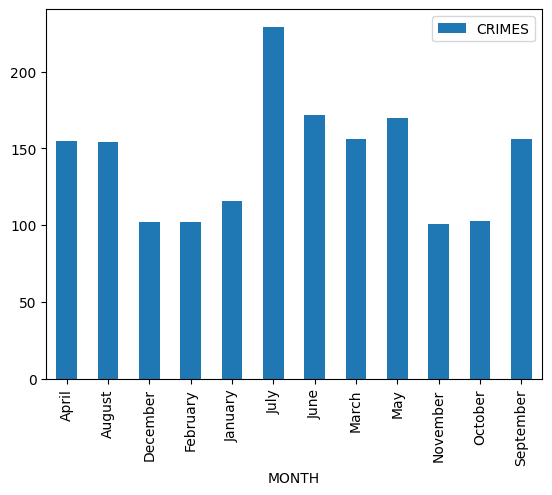

In [339]:
visu = grouped_by_month.plot.bar(x = 'MONTH', y = 'CRIMES')

In [340]:
grouped_by_boro = cleaned_data_frame.groupby('BORO').agg({'BORO':['count']})
grouped_by_boro = grouped_by_boro.reset_index()
grouped_by_boro.columns = ['LOCATION' , 'TOT_CRIMES']
grouped_by_boro.nlargest(5,'TOT_CRIMES')

,LOCATION,TOT_CRIMES
1,BROOKLYN,568
0,BRONX,535
2,MANHATTAN,307
3,QUEENS,266
4,STATEN ISLAND,40


In [341]:
group_by_gender = cleaned_data_frame.groupby("VIC_SEX").agg({"VIC_SEX":["count"]})
group_by_gender = group_by_gender.reset_index()
group_by_gender.columns = ["GENDER","TOT_DEATHS"]
max_gender_str = group_by_gender.nlargest(2,"TOT_DEATHS").iloc[0].GENDER
max_gender_deaths = group_by_gender.nlargest(2,"TOT_DEATHS").iloc[0].TOT_DEATHS
group_by_gender

,GENDER,TOT_DEATHS
0,F,212
1,M,1504


In [342]:
grouped_by_race = cleaned_data_frame.groupby("VIC_RACE").agg({"VIC_RACE":["count"]})
grouped_by_race = grouped_by_race.reset_index()
grouped_by_race.columns = ["RACE","TOT_DEATHS"]
max_race_name = grouped_by_race.nlargest(3,"TOT_DEATHS").iloc[0].RACE
max_race_deaths = grouped_by_race.nlargest(3,"TOT_DEATHS").iloc[0].TOT_DEATHS
grouped_by_race

,RACE,TOT_DEATHS
0,AMERICAN INDIAN/ALASKAN NATIVE,1
1,ASIAN / PACIFIC ISLANDER,50
2,BLACK,1158
3,BLACK HISPANIC,161
4,UNKNOWN,1
5,WHITE,38
6,WHITE HISPANIC,307


In [ ]:
filtrado = cleaned_data_frame[cleaned_data_frame["VIC_SEX"] == "{}".format(max_gender_str)]
filtrado = filtrado[cleaned_data_frame["VIC_RACE"] == "{}".format(max_race_name)]
max_gender_killed = filtrado.VIC_SEX.count()
porcentaje = ((max_gender_killed*100)/max_gender_deaths)

In [349]:
print("Out of {} {} killed, {} are {} ({}%)".format(max_gender_deaths,max_gender_str, max_gender_killed,max_race_name,porcentaje.round() ))

Out of 1504 M killed, 1026 are BLACK (68.0%)
